Regression Case Study - Dawson Alexander - 30042474


In [ ]:
# import modules
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt

# import file with data
data = pd.read_csv("RegressionData.csv")
#data.head()

In [ ]:
# plotting correlation heatmap
#dataplot=sb.heatmap(data.corr())
  
# displaying heatmap
#mp.show()

In [ ]:
#https://www.projectpro.io/recipes/drop-out-highly-correlated-features-in-python
cor_matrix = data.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))
#sums = data.sum()
#print(sums)

#categories_drop = [column for column in sums == 0]

categories_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 2)]
categories_drop.append("Left-WM-hypointensities")
categories_drop.append("Right-WM-hypointensities")
categories_drop.append("Left-non-WM-hypointensities")
categories_drop.append("Right-non-WM-hypointensities")
categories_drop.append("S.No")
categories_drop.append("dataset")
categories_drop.append("Age")

target = data["Age"]

refinedData = data.drop(categories_drop, axis=1)
#refinedData.head()

In [ ]:
#dataplot2=sb.heatmap(refinedData.corr())

# displaying heatmap
#mp.show()

In [ ]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(refinedData, target, test_size=0.2, random_state=42)
#print(x_train, x_test, y_train, y_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

#x_train, y_train = make_regression(n_features=4, n_informative=2, random_state=0, shuffle=False)
regr = RandomForestRegressor(max_depth=20, random_state=0)
regr.fit(x_train, y_train)

#model = tree.DecisionTreeClassifier()
#model.fit(x_train, y_train)

#result = regr.score(x_test, y_test)
#results = regr.score(y_true, y_pred)
#print("Accuracy: %.2f%%" % (result*100.0))

RandomForestRegressor(max_depth=20, random_state=0)

In [ ]:
y_pred = regr.predict(x_test)
from sklearn.metrics import r2_score

y_pred_test = regr.predict(x_test)
y_pred_train = regr.predict(x_train)

r2_train = r2_score(y_train, y_pred_train)
print("Training r2 for Multiple Linear Regression Model: ", r2_train)

r2_test = r2_score(y_test, y_pred_test)
print("Testing r2 for Multiple Linear Regression Model: ", r2_test)

RMSE_train = sqrt(mean_squared_error(y_train, y_pred_train))
print("RMSE for Training Data: ", RMSE_train)

RMSE_test = sqrt(mean_squared_error(y_test, y_pred_test))
print("RMSE for Testing Data: ", RMSE_test)

Training r2 for Multiple Linear Regression Model:  0.9802772047929041
Testing r2 for Multiple Linear Regression Model:  0.8784756425625044
RMSE for Training Data:  2.809772280964213
RMSE for Testing Data:  7.06006884736657


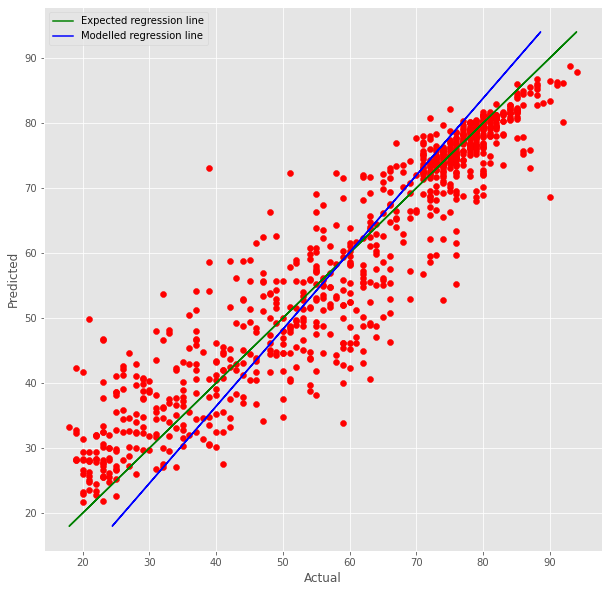

In [ ]:
plt.figure(figsize=(10, 10))
with plt.style.context('ggplot'):
    plt.scatter(y_test, y_pred_test, color='red')
    plt.plot(y_test, y_test, '-g', label='Expected regression line')
    z = np.polyfit(y_test, y_pred_test, 1)
    plt.plot(np.polyval(z, y_test), y_test, color='blue', label='Modelled regression line')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.legend()
    plt.plot()

In [ ]:
from sklearn import linear_model
from sklearn.linear_model import Lasso

In [ ]:
import matplotlib.pyplot as plt

x_train, x_test, y_train, y_test = train_test_split(refinedData, target, test_size=0.2, random_state=42)

alpha = 0.1
lasso = Lasso(alpha=alpha)

y_pred_lasso = lasso.fit(x_train, y_train).predict(x_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)

from sklearn.linear_model import ElasticNet

enet = ElasticNet(alpha=alpha, l1_ratio=0.7)

y_pred_enet = enet.fit(x_train, y_train).predict(x_test)
r2_score_enet = r2_score(y_test, y_pred_enet)

y_pred_test = lasso.predict(x_test)
y_pred_train = lasso.predict(x_train)

r2_train = r2_score(y_train, y_pred_train)
print("Training r2 for Multiple Linear Regression Model: ", r2_train)

r2_test = r2_score(y_test, y_pred_test)
print("Testing r2 for Multiple Linear Regression Model: ", r2_test)

RMSE_train = sqrt(mean_squared_error(y_train, y_pred_train))
print("RMSE for Training Data: ", RMSE_train)

RMSE_test = sqrt(mean_squared_error(y_test, y_pred_test))
print("RMSE for Testing Data: ", RMSE_test)

C:\Users\dawso\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 115409.46120054054, tolerance: 135.29772142011836
  model = cd_fast.enet_coordinate_descent(


Training r2 for Multiple Linear Regression Model:  0.83409591340947
Testing r2 for Multiple Linear Regression Model:  0.8383009048873684
RMSE for Training Data:  8.149208566862612
RMSE for Testing Data:  8.14387434660989


C:\Users\dawso\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 115065.83406705302, tolerance: 135.29772142011836
  model = cd_fast.enet_coordinate_descent(


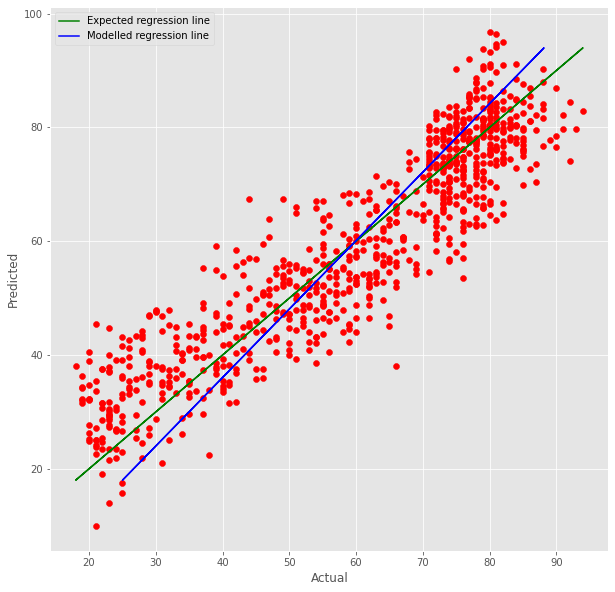

In [ ]:
plt.figure(figsize=(10, 10))
with plt.style.context('ggplot'):
    plt.scatter(y_test, y_pred_test, color='red')
    plt.plot(y_test, y_test, '-g', label='Expected regression line')
    z = np.polyfit(y_test, y_pred_test, 1)
    plt.plot(np.polyval(z, y_test), y_test, color='blue', label='Modelled regression line')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.legend()
    plt.plot()

In [ ]:
from sklearn.tree import DecisionTreeRegressor

x_train, x_test, y_train, y_test = train_test_split(refinedData, target, test_size=0.2, random_state=42)

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=1)
regr_2 = DecisionTreeRegressor(max_depth=2)
regr_3 = DecisionTreeRegressor(max_depth=5)
regr_4 = DecisionTreeRegressor(max_depth=8)

regr_1.fit(x_train, y_train)
regr_2.fit(x_train, y_train)
regr_3.fit(x_train, y_train)
regr_4.fit(x_train, y_train)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(x_test)
y_2 = regr_2.predict(x_test)
y_3 = regr_3.predict(x_test)
y_4 = regr_4.predict(x_test)

r2_score_DT = r2_score(y_test, y_1)
print("r^2 (Max Depth = 1) : %f" % r2_score_DT)
print("RMSE:", sqrt(mean_squared_error(y_test, y_1)))
r2_score_DT = r2_score(y_test, y_2)
print("r^2 (Max Depth = 2) : %f" % r2_score_DT)
print("RMSE:", sqrt(mean_squared_error(y_test, y_2)))
r2_score_DT = r2_score(y_test, y_3)
print("r^2 (Max Depth = 3) : %f" % r2_score_DT)
print("RMSE:", sqrt(mean_squared_error(y_test, y_3)))
r2_score_DT = r2_score(y_test, y_4)
print("r^2 (Max Depth = 4) : %f" % r2_score_DT)
print("RMSE:", sqrt(mean_squared_error(y_test, y_4)))


y_pred_test = regr_4.predict(x_test)
y_pred_train = regr_4.predict(x_train)

r2_train = r2_score(y_train, y_pred_train)
print("Training r2 for Multiple Linear Regression Model: ", r2_train)

r2_test = r2_score(y_test, y_pred_test)
print("Testing r2 for Multiple Linear Regression Model: ", r2_test)

RMSE_train = sqrt(mean_squared_error(y_train, y_pred_train))
print("RMSE for Training Data: ", RMSE_train)

RMSE_test = sqrt(mean_squared_error(y_test, y_pred_test))
print("RMSE for Testing Data: ", RMSE_test)

r^2 (Max Depth = 1) : 0.537088
RMSE: 13.779286132494477
r^2 (Max Depth = 2) : 0.640084
RMSE: 12.150047674380763
r^2 (Max Depth = 3) : 0.771752
RMSE: 9.67567378640591
r^2 (Max Depth = 4) : 0.796517
RMSE: 9.135700164422634
Training r2 for Multiple Linear Regression Model:  0.9129070787642639
Testing r2 for Multiple Linear Regression Model:  0.7965165295088982
RMSE for Training Data:  5.90443464744655
RMSE for Testing Data:  9.135700164422634


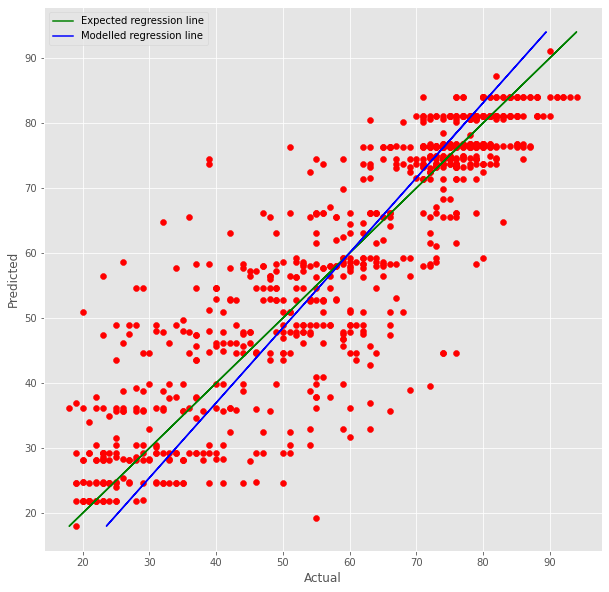

In [ ]:
plt.figure(figsize=(10, 10))
with plt.style.context('ggplot'):
    plt.scatter(y_test, y_pred_test, color='red')
    plt.plot(y_test, y_test, '-g', label='Expected regression line')
    z = np.polyfit(y_test, y_pred_test, 1)
    plt.plot(np.polyval(z, y_test), y_test, color='blue', label='Modelled regression line')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.legend()
    plt.plot()